# A) Data Wrangling
## 1. Gathering

In [1]:
import pandas as pd
import numpy as np

twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

**Downloaded the above data by clicking on a link in the browser which contains twitter archive of user @WeRateDogs**

In [2]:
import os, requests

response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8')

**Above data contains image predictions for tweets eg: whether dog or not? if so, which breed?**

In [3]:
import tweepy, json

In [4]:
data = []
with open('tweet-json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_json = pd.DataFrame.from_dict(data)

**Downloaded the above json data from twitter's developer access which contains data needed for retweets and favorites counts**

## 2. Assessing

In [5]:
twitter_archives.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
806   772102971039580160                    NaN                  NaN   
907   757741869644341248                    NaN                  NaN   
720   783347506784731136                    NaN                  NaN   
380   827600520311402496                    NaN                  NaN   
1046  743545585370791937                    NaN                  NaN   

                      timestamp  \
806   2016-09-03 16:04:27 +0000   
907   2016-07-26 00:58:34 +0000   
720   2016-10-04 16:46:14 +0000   
380   2017-02-03 19:31:54 +0000   
1046  2016-06-16 20:47:36 +0000   

                                                 source  \
806   <a href="http://twitter.com/download/iphone" r...   
907   <a href="http://twitter.com/download/iphone" r...   
720   <a href="http://twitter.com/download/iphone" r...   
380   <a href="http://twitter.com/download/iphone" r...   
1046  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
806   This is Penny. She's an OU cheerleader. About ...                  NaN   
907   This is Leonard. He hides in bushes to escape ...                  NaN   
720   RT @dog_rates: This is Kenny. He just wants to...         6.742918e+17   
380   Meet Tucker. It's his birthday. He's pupset wi...                  NaN   
1046  Say hello to Bentley and Millie. They do every...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
806                        NaN                        NaN   
907                        NaN                        NaN   
720               4.196984e+09  2015-12-08 18:17:56 +0000   
380                        NaN                        NaN   
1046                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
806   https://twitter.com/dog_rates/status/772102971...                11   
907   https://twitter.com/dog_rates/status/757741869...                10   
720   https://twitter.com/dog_rates/status/674291837...                11   
380   https://twitter.com/dog_rates/status/827600520...                13   
1046  https://twitter.com/dog_rates/status/743545585...                11   

      rating_denominator     name doggo floofer pupper puppo  
806                   10    Penny  None    None   None  None  
907                   10  Leonard  None    None   None  None  
720                   10    Kenny  None    None   None  None  
380                   10   Tucker  None    None   None  None  
1046                  10  Bentley  None    None   None  None

In [6]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
image_predictions.sample(5)

tweet_id                                            jpg_url  \
1941  861005113778896900    https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg   
1707  817777686764523521  https://pbs.twimg.com/ext_tw_video_thumb/81777...   
1796  831322785565769729    https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg   
1664  812466873996607488    https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg   
1633  805932879469572096    https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg   

      img_num                      p1   p1_conf  p1_dog  \
1941        1         German_shepherd  0.507951    True   
1707        1  curly-coated_retriever  0.733256    True   
1796        1    Old_English_sheepdog  0.999715    True   
1664        1              bath_towel  0.099804   False   
1633        1      Norwegian_elkhound  0.657967    True   

                         p2   p2_conf  p2_dog                   p3   p3_conf  \
1941               Pembroke  0.136113    True               muzzle  0.075764   
1707  flat-coated_retriever  0.214145    True  Irish_water_spaniel  0.029769   
1796        Tibetan_terrier  0.000046    True           guinea_pig  0.000041   
1664                 pillow  0.092318   False           Great_Dane  0.078205   
1633               keeshond  0.319136    True             Leonberg  0.007947   

      p3_dog  
1941   False  
1707    True  
1796   False  
1664    True  
1633    True

In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweet_json.sample(5)

created_at                  id              id_str  \
2038  Tue Dec 01 04:22:29 +0000 2015  671544874165002241  671544874165002241   
1956  Sun Dec 06 19:13:01 +0000 2015  673580926094458881  673580926094458881   
1757  Mon Dec 21 00:53:29 +0000 2015  678740035362037760  678740035362037760   
617   Wed Nov 09 02:29:25 +0000 2016  796177847564038144  796177847564038144   
583   Sun Nov 20 00:59:15 +0000 2016  800141422401830912  800141422401830912   

                                              full_text  truncated  \
2038  Interesting dog here. Very large. Purple. Mani...      False   
1956  When you ask your professor about extra credit...      False   
1757  Meet Tango. He's a large dog. Doesn't care muc...      False   
617   RT @dog_rates: This is Ruby. She just turned o...      False   
583   This is Peaches. She's the ultimate selfie sid...      False   

     display_text_range                                           entities  \
2038           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1956           [0, 101]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1757           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
617            [0, 127]  {'hashtags': [], 'symbols': [], 'user_mentions...   
583             [0, 96]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
2038  {'media': [{'id': 671544869609857024, 'id_str'...   
1956  {'media': [{'id': 673580917777178625, 'id_str'...   
1757  {'media': [{'id': 678740029439614976, 'id_str'...   
617   {'media': [{'id': 796149732779421699, 'id_str'...   
583   {'media': [{'id': 800141411257643009, 'id_str'...   

                                                 source  \
2038  <a href="http://twitter.com/download/iphone" r...   
1956  <a href="http://twitter.com/download/iphone" r...   
1757  <a href="http://twitter.com/download/iphone" r...   
617   <a href="http://twitter.com/download/iphone" r...   
583   <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ... favorite_count  favorited retweeted  \
2038                    NaN  ...           2126      False     False   
1956                    NaN  ...            882      False     False   
1757                    NaN  ...           4099      False     False   
617                     NaN  ...              0      False     False   
583                     NaN  ...          17092      False     False   

     possibly_sensitive possibly_sensitive_appealable lang  \
2038              False                         False   en   
1956              False                         False   en   
1757              False                         False   en   
617               False                         False   en   
583               False                         False   en   

                                       retweeted_status quoted_status_id  \
2038                                                NaN              NaN   
1956                                                NaN              NaN   
1757                                                NaN              NaN   
617   {'created_at': 'Wed Nov 09 00:37:46 +0000 2016...              NaN   
583                                                 NaN              NaN   

     quoted_status_id_str  quoted_status  
2038                  NaN            NaN  
1956                  NaN            NaN  
1757                  NaN            NaN  
617                   NaN            NaN  
583                   NaN            NaN  

[5 rows x 31 columns]

In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Tidiness
- Remove duplicate columns from tweet_json that are already present in twitter_archives
- Need to merge tweet_json and image_predictions with twitter_archives on tweet_id key

### Quality
- Change column values in doggo, floofer, pupper, puppo columns from column name to True or False
- Need to drop unnecessary columns from twitter_archives_clean
- Change column dtype from float to int wherever necessary
- Many rows will be lost when merged as image_predictions is missing those rows
- Need to extract only link from source column 
- Change some dog names from none, incomplete names to nan
- Need to convert some rows where denominator is greater than 10 to 10

    

## 3. Cleaning

### a) Tidiness

In [11]:
tweet_json.drop(['created_at'], axis=1, inplace=True)
tweet_json.drop(tweet_json.iloc[:, 1:19], axis=1, inplace=True)
tweet_json.drop(tweet_json.iloc[:, 3:], axis=1, inplace=True)
tweet_json.rename(columns={'id': 'tweet_id'}, inplace=True)

twitter_archives_clean = pd.merge(twitter_archives, tweet_json, left_on='tweet_id', right_on='tweet_id')
twitter_archives_clean = pd.merge(twitter_archives_clean, image_predictions, left_on='tweet_id', right_on='tweet_id')
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

**Dropped duplicate columns and merged all the dataframes into twitter_archives_clean**

### b) Quality

In [12]:
def t_or_f(df, col):
    if df[col] == col:
        return True
    else:
        return False
    
twitter_archives_clean['doggo'] = twitter_archives_clean.apply(t_or_f, args=('doggo',), axis=1)
twitter_archives_clean['floofer'] = twitter_archives_clean.apply(t_or_f, args=('floofer',), axis=1)
twitter_archives_clean['puppo'] = twitter_archives_clean.apply(t_or_f, args=('puppo',), axis=1)
twitter_archives_clean['pupper'] = twitter_archives_clean.apply(t_or_f, args=('pupper',), axis=1)
twitter_archives_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
470   800141422401830912                    NaN                  NaN   
1264  692142790915014657           6.920419e+17         4.196984e+09   
477   798933969379225600                    NaN                  NaN   
717   760290219849637889                    NaN                  NaN   
1920  668645506898350081                    NaN                  NaN   

                      timestamp  \
470   2016-11-20 00:59:15 +0000   
1264  2016-01-27 00:31:15 +0000   
477   2016-11-16 17:01:16 +0000   
717   2016-08-02 01:44:48 +0000   
1920  2015-11-23 04:21:26 +0000   

                                                 source  \
470   <a href="http://twitter.com/download/iphone" r...   
1264  <a href="http://twitter.com/download/iphone" r...   
477   <a href="http://twitter.com/download/iphone" r...   
717   <a href="http://twitter.com" rel="nofollow">Tw...   
1920  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
470   This is Peaches. She's the ultimate selfie sid...                  NaN   
1264  These are some pictures of Teddy that further ...                  NaN   
477   This is Iroh. He's in a predicament. 12/10 som...                  NaN   
717   This is Rocco. He's doing his best. 13/10 some...                  NaN   
1920  Incredibly rare dog here. Good at bipedalism. ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
470                        NaN                        NaN   
1264                       NaN                        NaN   
477                        NaN                        NaN   
717                        NaN                        NaN   
1920                       NaN                        NaN   

                                          expanded_urls  ...  img_num  \
470   https://twitter.com/dog_rates/status/800141422...  ...        3   
1264  https://twitter.com/dog_rates/status/692142790...  ...        3   
477   https://twitter.com/dog_rates/status/798933969...  ...        1   
717   https://twitter.com/dog_rates/status/760290219...  ...        1   
1920  https://twitter.com/dog_rates/status/668645506...  ...        1   

                        p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
470       golden_retriever  0.938048    True      kuvasz  0.025119    True   
1264            toy_poodle  0.670068    True       teddy  0.190898   False   
477         Siberian_husky  0.703224    True  Eskimo_dog  0.229351    True   
717   Old_English_sheepdog  0.302200    True       Lhasa  0.258803    True   
1920              ski_mask  0.302854   False    knee_pad  0.096881   False   

                      p3   p3_conf p3_dog  
470   Labrador_retriever  0.022977   True  
1264    miniature_poodle  0.032178   True  
477             malamute  0.044351   True  
717               briard  0.179200   True  
1920        balance_beam  0.084076  False  

[5 rows x 30 columns]

**Changed column values to true or false instead of column names**

In [13]:
twitter_archives_clean.in_reply_to_status_id = twitter_archives_clean.in_reply_to_status_id.fillna(0).astype('int64')
twitter_archives_clean.in_reply_to_user_id = twitter_archives_clean.in_reply_to_user_id.fillna(0).astype('int64')
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       2073 non-null   int64  
 2   in_reply_to_user_id         2073 non-null   int64  
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

**Changed columns from float to int wherever necessary**

In [14]:
twitter_archives_clean.source = twitter_archives_clean.source.str.extract(r'href="(.+?)"')
twitter_archives_clean.source.value_counts()

http://twitter.com/download/iphone              2032
http://twitter.com                                30
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

**Extracted only the link from source column**

In [15]:
twitter_archives_clean.name.replace(['a','None','the'], np.nan, inplace=True)
(twitter_archives_clean.name == 'None').value_counts(), (twitter_archives_clean.name == 'a').value_counts(), (twitter_archives_clean.name == 'the').value_counts()

(False    2073
 Name: name, dtype: int64,
 False    2073
 Name: name, dtype: int64,
 False    2073
 Name: name, dtype: int64)

**Replaced incomplete and null names with nan**

In [16]:
def den(df, col):
    if df[col] > 10:
        return int(10)
    else:
        return int(10)
    
twitter_archives_clean['rating_denominator'] = twitter_archives_clean.apply(den, args=('rating_denominator',), axis=1)
twitter_archives_clean.rating_denominator.value_counts()

10    2073
Name: rating_denominator, dtype: int64

**Converted denominator greater than 10 to 10**

# B) Data Analysis and Visualization

### Q1. What is the most common dog name?
### Q2. Are retweet counts and favorite counts correlated?
### Q3. How confident are image predictions?
<br><br><br>



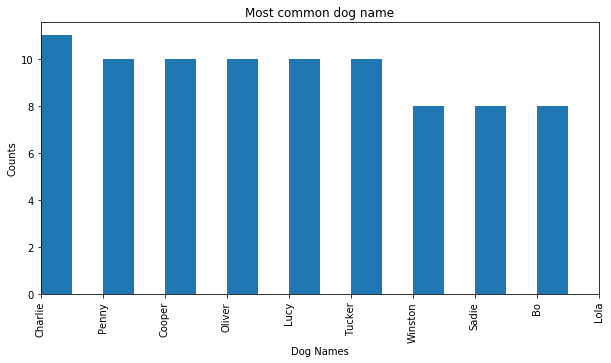

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

plt = twitter_archives_clean.name.value_counts().plot(figsize=(10,5), kind='bar', title='Most common dog name', align='edge')
plt.set_xlabel("Dog Names")
plt.set_ylabel("Counts")
plt.set_xlim([0,9])
plt

**As observed above, the most common dog name is Charlie** 

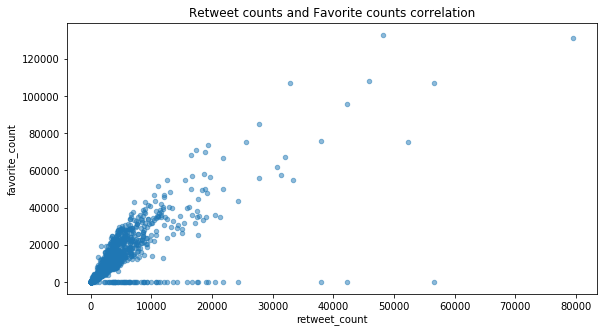

In [18]:
twitter_archives_clean.plot.scatter(figsize=(9.5,5), x='retweet_count', y='favorite_count', alpha=0.5, title='Retweet counts and Favorite counts correlation')

**As observed above, there is a positive correlation between Favorites and Retweets**

Text(0, 0.5, 'Conficence')

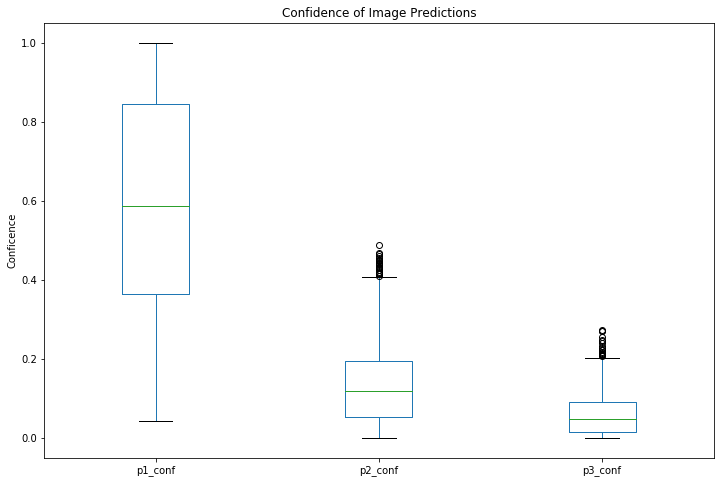

In [19]:
boxplot = twitter_archives_clean.boxplot(grid=False, figsize=(12,8), column=['p1_conf', 'p2_conf', 'p3_conf'])
boxplot.set_title('Confidence of Image Predictions')
boxplot.set_ylabel('Conficence')

**As observed above, P1 has very high confidence in most of the images compared to P2 and P3**

# Conclusions:<br>
- The most common dog name is Charlie followed by Oliver, Cooper and so on.
- It is proved that in most of the cases, people retweet what they like (favourites).
- P1 has a very high prediction accuracy, so high that if P1 is not accurate, P2 and P3 will also never be.

In [20]:
twitter_archives_clean.to_csv('twitter_archive_clean.csv')